In [56]:
!pip install pandas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
# Reading the file

df=pd.read_csv("Company Stock and Investment.csv")
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [58]:
# Going ahead with only Oil Investments
# Modellling for Oil Investments only

df.drop(['Gold Investments','Comp Stock','Other sharesInvestments'], axis = 1, inplace=True)
df

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256
...,...,...
1979,09-11-2017,0.005984
1980,10-11-2017,-0.007173
1981,13-11-2017,0.000352
1982,14-11-2017,-0.019376


In [59]:
# Checking columns have null values
df.isnull().sum().sort_values(ascending=False)

Oil Investments    0
Date               0
dtype: int64

In [60]:
# Convert Date object type to Datetime

df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1984 non-null   datetime64[ns]
 1   Oil Investments  1984 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.1 KB


In [62]:
df.set_index('Date',inplace=True)
df.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


In [63]:
df.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


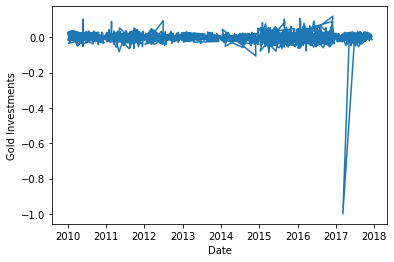

In [64]:
plt.xlabel("Date")
plt.ylabel("Oil Investments")
plt.plot(df)
#plt.figsize(20,10)
#df.plot()


In [65]:
#df.drop(df[df['Gold Investments']==-1].index, inplace=True)
#df.plot(figsize=(20,10))
#df.plot()

# determining rolling statistics

rolmean=df.rolling(window=30).mean()

rolstd=df.rolling(window=30).std()
print(rolmean,rolstd)

            Oil Investments
Date                       
2009-12-31              NaN
2010-04-01              NaN
2010-05-01              NaN
2010-06-01              NaN
2010-07-01              NaN
...                     ...
2017-09-11         0.003493
2017-10-11         0.003221
2017-11-13         0.003930
2017-11-14         0.003383
2017-11-15         0.003440

[1984 rows x 1 columns]             Oil Investments
Date                       
2009-12-31              NaN
2010-04-01              NaN
2010-05-01              NaN
2010-06-01              NaN
2010-07-01              NaN
...                     ...
2017-09-11         0.013562
2017-10-11         0.013695
2017-11-13         0.012932
2017-11-14         0.013566
2017-11-15         0.013516

[1984 rows x 1 columns]


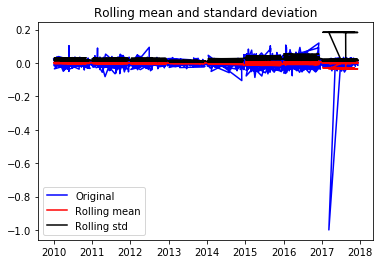

In [66]:
#Plotting rolling statistics

orig=plt.plot(df, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label='Rolling mean')
std=plt.plot(rolstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block=False)

In [67]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [69]:
test_results=adfuller(df['Oil Investments'])

In [70]:
test_results

(-45.942162929839924,
 0.0,
 0,
 1983,
 {'1%': -3.4336519592295947,
  '5%': -2.862998620943585,
  '10%': -2.567546508593341},
 -8042.187722182893)

In [ ]:
# Hypothesis testing - H1: it is stationary
def adfuller_test(stockprice):
    result=adfuller(stockprice)
    label=['ADF Test Statistic', 'p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,label):
        print(label+': '+str(value))
    if result[1]    <=0.05:
        print("Strong evidence against null hypotheses(Ho), reject the null hypothesis. Data is stationary...")
    else:
        print("Weak evidence against null hypotheses, Time series is non-stationary...")
    

In [ ]:
adfuller_test(df['Gold Investments'])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#model=ARIMA(df['Gold Investments'],order=(2,1,2))
model=ARIMA(df,order=(0,1,0))
model_fit=model.fit()

In [ ]:
model_fit.summary()

In [ ]:
df['forecast']=model_fit.predict(start=1800,end=1943, dynamic=True)
df[['Gold Investments','forecast']].plot(figsize=(15,15))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x) for x in range(0,24)]
future_dates

In [ ]:
#import pandas as pd
future_dataset=pd.dataFrame(index=future_dates,columns=df.columns)